In [1]:
# Import the usual stuff
import numpy as np
import matplotlib.pyplot as plt

# Path to harmonic oscillator modules
import sys
import os
module_path=os.path.abspath('/Users/zentner/Work/PhysicsModels/schrodinger1d')
if module_path not in sys.path:
    sys.path.append(module_path)

import schrodinger_solver_1d as sch
import potentials_1d as pot
import wavefunctions as psi
import find_eigen_functions as eigen

In [2]:
# ---- my spatial and Fourier grid ----
N = 2**13
y_max = 6.0
grid_fft = sch.make_grid(N, y_max)

In [3]:
# ---- initial state ----
t0 = 0.0 # initial time
n0 = 1 # initial eigenstate, n=1 is ground state of particle in a box!
psi0 = psi.box_eigenstate(grid_fft.y, n0) # the wavefunction, start in state n0
e0 = psi.box_energy(n0) # energy of the intial state.
print(rf'The energy of the initial state is {e0:.2e} in units of $\hbar^2/mL^2$')

#----- set up a square_well potential callable
v0 = 10.0*e0
v_box = pot.SquareWell(v0)

The energy of the initial state is 4.93e+00 in units of $\hbar^2/mL^2$


In [4]:
# ---- time grid ----
tmax = 20.0/e0 # set the timestep according to the natural scale of evolution.
tau_grid = np.linspace(0.0,5.0,2001)

# ---- evolve using fft ----
psi_g, diag = eigen.imaginary_time_propagate_fft(psi0=psi0,
                            V_of_y_tau=v_box,
                            tau_grid=tau_grid,
                            grid=grid_fft,
                            return_all=True)

# ---- check the drift of the normalization ---
print("Norm drift:", diag["norm"].min(), diag["norm"].max())
if ( np.abs(diag["norm"].max() - diag["norm"].min()) > 1.0e-4 ):
    print(" Unacceptably large norm drift.")
print(' ')

psi_ground = psi_g[-1]

Norm drift: 0.9999999999999994 1.0000000000000004
 


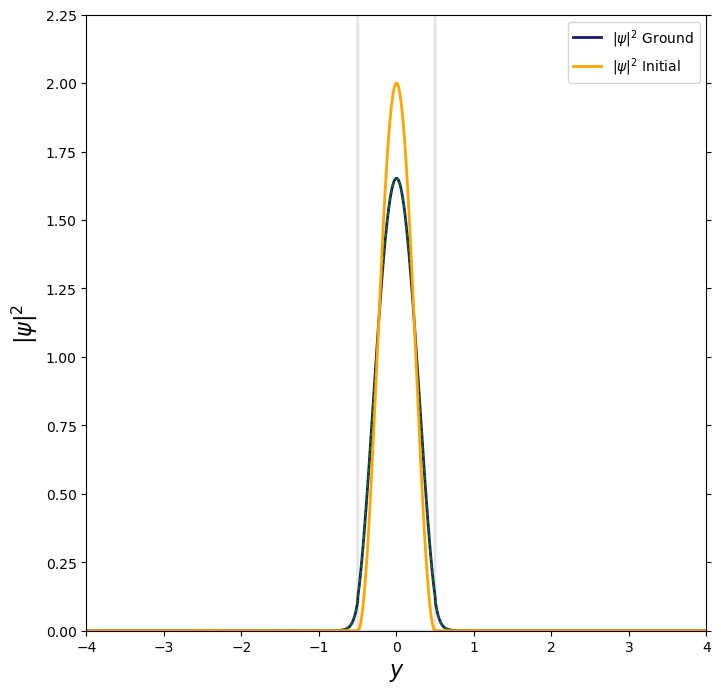

In [5]:
#Plot |psi|^2 #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid_fft.y,diag["tau"][0])

plt.plot(grid_fft.y,v,linewidth=2.0,color='black',alpha=0.1)
plt.plot(grid_fft.y,np.abs(psi_g[-1])**2,linewidth=2.0,color='midnightblue',label=r'$\vert \psi \vert^2$ Ground')
plt.plot(grid_fft.y,np.abs(psi_g[-20])**2,linewidth=1.0,color='green',linestyle='dashed')
plt.plot(grid_fft.y,np.abs(psi_g[0])**2,linewidth=2.0,color='orange',label=r'$\vert \psi \vert^2$ Initial')

plt.xlabel(r"$y$",fontsize=16)
plt.ylabel(r"$\vert \psi \vert^2$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(-4.0,4.0)
plt.ylim(0.0,2.25)

plt.legend()
plt.show()

In [6]:
#---- check the converegence of <H> ----
Nt = psi_g.shape[0]
H = np.empty(Nt,dtype=float)
for j in range(Nt):
    vals = sch.expectation_H(psi=psi_g[j],
                             grid=grid_fft,
                             V_of_y_tau=v_box,
                             tau=float(tau_grid[j])
                            )
    H[j] = vals["H"]

ValueError: x and y must have same first dimension, but have shapes (19999,) and (2001,)

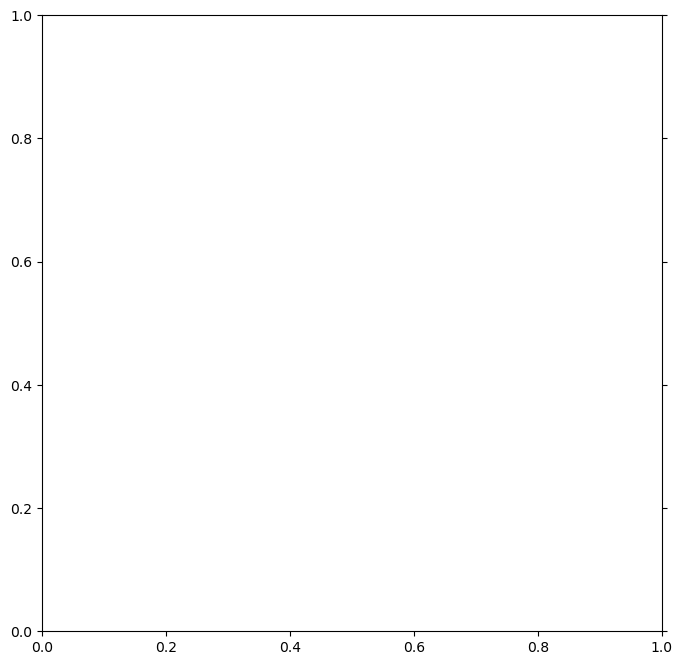

In [14]:
# Check <H> #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid_fft.y,diag["tau"][0])

plt.plot(diag["tau"],H,linewidth=2.0,color='midnightblue',label=r'$\langle \hat{H} \rangle$')

plt.xlabel(r"$\tau$",fontsize=16)
plt.ylabel(r"$\langle \hat{H} \rangle$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(0.0,5.0)
#plt.ylim(2.6,2.8)

plt.legend()
plt.show()

In [8]:
# ---- my spatial and Fourier grid ----
N = 2**13
y_max = 6.0
grid = sch.make_grid(N, y_max)

In [9]:
#---- evolve the ground state and check that it does not evolve! --|

# ---- initial state ----
t0 = 0.0 # initial time
n0 = 1 # initial eigenstate, n=1 is ground state of particle in a box!
psi0 = psi_ground # the wavefunction, start in state n0
vals = sch.expectation_H(psi=psi0,
                             grid=grid_fft,
                             V_of_y_tau=v_box,
                             tau=float(t0)
                        )
e_ground = vals["H"] # energy of the intial state.
print(rf'The energy of the initial state is {e_ground:.2e} in units of $\hbar^2/mL^2$')


The energy of the initial state is 3.80e+00 in units of $\hbar^2/mL^2$


In [10]:
# ---- time grid ----
tmax = 20.0/e0 # set the timestep according to the natural scale of evolution.
dt = 0.01/v0
Nt = int(round(tmax/dt))
tau_grid=dt*np.arange(Nt-1)
tau_grid[-1]=tmax
print(f' The final time for the system is {tmax:.2e}')
print(f' The number of timesteps is {tau_grid.size:d}')

# ---- evolve using fft ----
psi_t, diag = sch.yoshida_step_propagate(psi0=psi0,
                            V_of_y_tau=v_box,
                            tau_grid=tau_grid,
                            grid=grid_fft,
                            return_all=True)

# ---- check the drift of the normalization ---
print("Norm drift:", diag["norm"].min(), diag["norm"].max())
if ( np.abs(diag["norm"].max() - diag["norm"].min()) > 1.0e-4 ):
    print(" Unacceptably large norm drift.")
print(' ')

 The final time for the system is 4.05e+00
 The number of timesteps is 19999
Norm drift: 1.0 1.0000000000026565
 


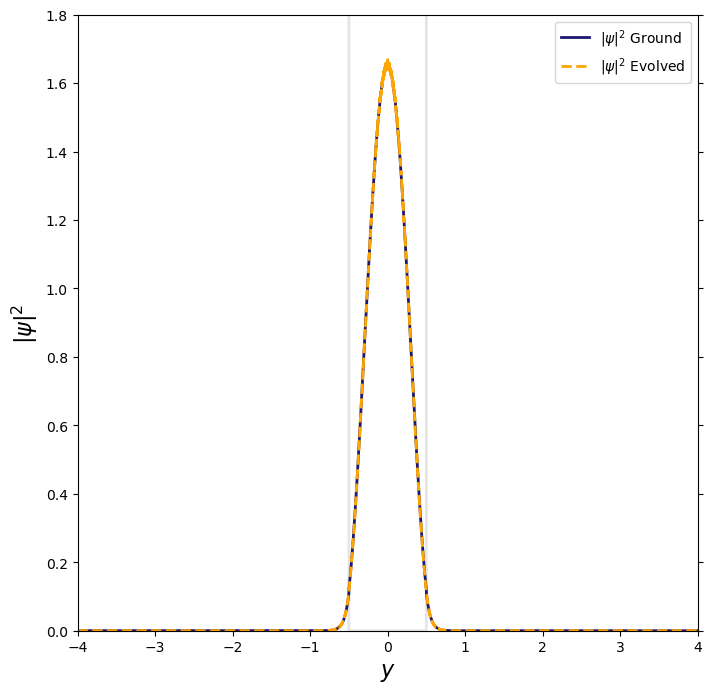

In [11]:
#Plot |psi|^2 #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid_fft.y,diag["tau"][0])

plt.plot(grid_fft.y,v,linewidth=2.0,color='black',alpha=0.1)
plt.plot(grid_fft.y,np.abs(psi_ground)**2,linewidth=2.0,color='midnightblue',label=r'$\vert \psi \vert^2$ Ground')
plt.plot(grid_fft.y,np.abs(psi_t[-1])**2,linewidth=2.0,color='orange',linestyle='dashed',label=r'$\vert \psi \vert^2$ Evolved')

plt.xlabel(r"$y$",fontsize=16)
plt.ylabel(r"$\vert \psi \vert^2$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(-4.0,4.0)
plt.ylim(0.0,1.80)

plt.legend()
plt.show()

In [12]:
# --- lastly, let's try to find the first few excited states in addition ---
# --- it needs an energy function
def energy_fn(psi):
    return sch.expectation_H(psi=psi, grid=grid_fft, V_of_y_tau=v_box, bc="fft")["H"]

n_states=5

#--- guesses
psiguess=[None]*n_states
for i in range(n_states):
    psiguess[i]=psi.box_eigenstate(grid_fft.y,i+1)

#--- find the first few states
res = eigen.find_states_imag_time(
    n_states=n_states,
    grid=grid_fft,
    V_of_y=v_box,
    energy_fn=energy_fn,
    psi_guesses=psiguess
)

Es = res["energies"]
psis = res["psis"]
print("Energies:", Es)

Energies: [ 3.4182413  13.48987338 29.45805906 47.91404139 49.38841754]


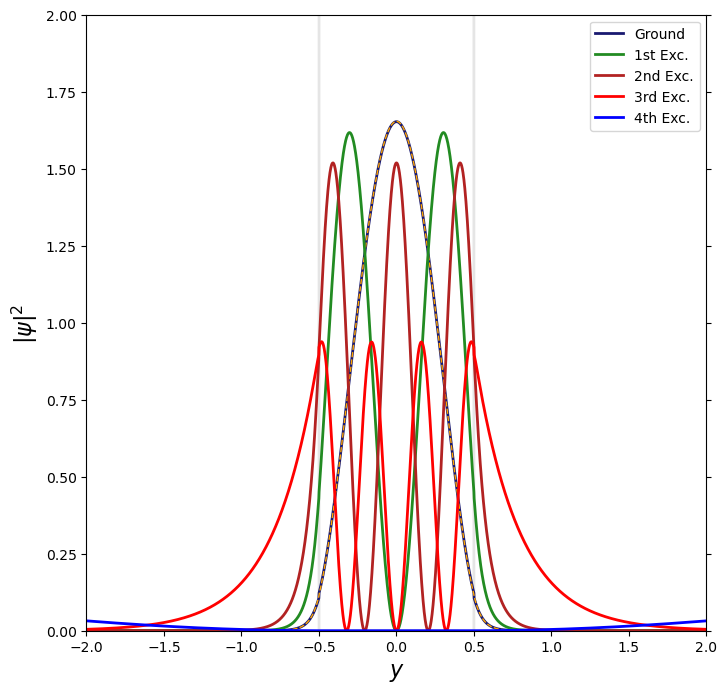

In [13]:
#Plot |psi|^2 #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid_fft.y,diag["tau"][0])

psi0 = psis[0]
psi1 = psis[1]
psi2 = psis[2]
psi3 = psis[3]
psi4 = psis[4]

plt.plot(grid_fft.y,v,linewidth=2.0,color='black',alpha=0.1)
plt.plot(grid_fft.y,np.abs(psi_ground)**2,linewidth=2.0,color='midnightblue',label=r'Ground')
plt.plot(grid_fft.y,np.abs(psi0)**2,linewidth=1.0,color='orange',linestyle='dashed')
plt.plot(grid_fft.y,np.abs(psi1)**2,linewidth=2.0,color='forestgreen',label='1st Exc.')
plt.plot(grid_fft.y,np.abs(psi2)**2,linewidth=2.0,color='firebrick',label='2nd Exc.')
plt.plot(grid_fft.y,np.abs(psi3)**2,linewidth=2.0,color='red',label='3rd Exc.')
plt.plot(grid_fft.y,np.abs(psi4)**2,linewidth=2.0,color='blue',label='4th Exc.')

plt.xlabel(r"$y$",fontsize=16)
plt.ylabel(r"$\vert \psi \vert^2$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(-2.0,2.0)
plt.ylim(0.0,2.00)

plt.legend()
plt.show()